In [13]:
import torch
import torch.nn.functional as F
from torch import nn, einsum

import lovely_tensors as lt
from x_clip.tokenizer import tokenizer

lt.monkey_patch()

In [2]:
raw_texts = ['dog eating food', 'cat running on grass']

In [3]:
texts = tokenizer.tokenize(raw_texts)

In [5]:
texts

tensor[2, 256] i64 n=512 x∈[0, 5922] μ=37.959 σ=378.212

In [10]:
from musiclm_pytorch import MuLaN, AudioSpectrogramTransformer, TextTransformer

audio_transformer = AudioSpectrogramTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64,
    spec_n_fft = 128,
    spec_win_length = 24,
    spec_aug_stretch_factor = 0.8
)

text_transformer = TextTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64
)

mulan = MuLaN(
    audio_transformer = audio_transformer,
    text_transformer = text_transformer
)

In [11]:
from musiclm_pytorch import MuLaNEmbedQuantizer

quantizer = MuLaNEmbedQuantizer(
    mulan = mulan,                          # pass in trained mulan from above
    conditioning_dims = (1024, 1024, 1024), # say all three transformers have model dimensions of 1024
    namespaces = ('semantic', 'coarse', 'fine')
)

In [12]:
def l2norm(t):
    return F.normalize(t, p = 2, dim = -1)

In [14]:
l2norm(torch.randn(10, 20, 4))

tensor[10, 20, 4] n=800 x∈[-0.994, 0.934] μ=0.001 σ=0.500

In [16]:
torch.arange(20).reshape(4, 5).v

tensor[4, 5] i64 n=20 x∈[0, 19] μ=9.500 σ=5.916
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

In [19]:
l2norm(torch.arange(20, dtype=torch.float32).reshape(4, 5)).v

tensor[4, 5] n=20 x∈[0., 0.730] μ=0.423 σ=0.148
tensor([[0.0000, 0.1826, 0.3651, 0.5477, 0.7303],
        [0.3131, 0.3757, 0.4384, 0.5010, 0.5636],
        [0.3701, 0.4071, 0.4441, 0.4812, 0.5182],
        [0.3932, 0.4195, 0.4457, 0.4719, 0.4981]])

In [21]:
torch.arange(5).v

tensor[5] i64 x∈[0, 4] μ=2.000 σ=1.581 [0, 1, 2, 3, 4]
tensor([0, 1, 2, 3, 4])

In [ ]:
F.normalize()

In [24]:
torch.sqrt(torch.tensor(1/30))

tensor 0.183

In [ ]:
# sqrt(a_i/ sum_i a_i^2)

In [35]:
import torch
import numpy as np
from PIL import Image
from torchvision.transforms import ToTensor, Resize
img = Image.open('/home/aiteam/tykim/audio/data/dog-1196646.jpg')

In [37]:
tt = ToTensor()
rz = Resize((256,256))

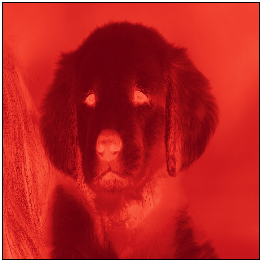

In [47]:
rz(tt(img))[0].chans(cmap='Reds')

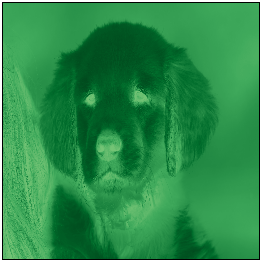

In [51]:
rz(tt(img))[1].chans(cmap='Greens')

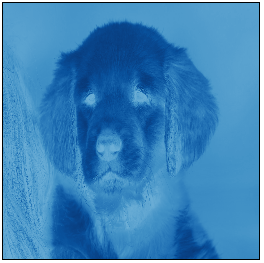

In [50]:
rz(tt(img))[2].chans(cmap='Blues')